# Travel Maps

Country shapefiles from gadm.org

## Preliminaries and functions

In [1]:
import shapefile
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import LineCollection
from matplotlib import rcParams, rc_context, patheffects

%matplotlib inline

In [2]:
# Kind of a customized plt.xkcd()-settings
rcParams['font.family'] = ['Humor Sans', 'Comic Sans MS']
rcParams['font.size'] = 8.0
rcParams['path.sketch'] = (1, 100, 2) # 1, 100, 2
rcParams['path.effects'] = [patheffects.withStroke(linewidth=2, foreground="w")]
rcParams['axes.linewidth'] = 1.0
rcParams['lines.linewidth'] = 1.0
rcParams['figure.facecolor'] = 'white'
rcParams['grid.linewidth'] = 0.0
rcParams['axes.unicode_minus'] = False

# BMK colour-cycle
rcParams['axes.color_cycle'] = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00',
                                 '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']

# Adjust dpi, so figure on screen and savefig looks the same
rcParams['figure.dpi'] = 300
rcParams['savefig.dpi'] = 300

In [3]:
def plot_country(countries, bmap, fc=None, ec='none', lw=1, adm=0):
    '''Colour <countries> with a <bmap> projection.
    Adapted from:
    http://www.geophysique.be/2013/02/12/matplotlib-basemap-tutorial-10-shapefiles-unleached-continued
    '''

    # Get current axis
    cax = plt.gca()

    # Fill visited countries
    for country in countries:
    
        # Get shapefile for the country; extract shapes and records
        r = shapefile.Reader('data/TravelMap/'+country+'_adm/'+country+'_adm'+str(adm))
        shapes = r.shapes()
        records = r.records()

        for record, shape in zip(records,shapes):
            lons,lats = zip(*shape.points)
            data = np.array(bmap(lons, lats)).T

            if len(shape.parts) == 1:
                segs = [data,]
            else:
                segs = []
                for i in range(1,len(shape.parts)):
                    index = shape.parts[i-1]
                    index2 = shape.parts[i]
                    segs.append(data[index:index2])
                segs.append(data[index2:])

            # If facecolor is provided, use; else cycle through colours
            lines = LineCollection(segs,antialiaseds=(1,))
            if fc:
                lines.set_facecolors(fc)
            else:
                lines.set_facecolors(next(cax._get_lines.color_cycle))


            lines.set_edgecolors(ec)
            lines.set_linewidth(lw)

            # Add to plot
            cax.add_collection(lines)

In [4]:
def plot_arrow(start, end, bmap, ec="k", fc="w", rad=-.3):
    '''Plot an arrow from <start> to <end>, with a <bmap> projection.'''
    
    # Get current axis
    cax = plt.gca()
    
    # Plot arrow
    cax.annotate('', bmap(end[1], end[0]), bmap(start[1], start[0]),
                arrowprops=dict(arrowstyle='Fancy, head_length=.6, head_width=.6, tail_width=.4',
                                alpha=.6,
                                patchA=None,
                                patchB=None,
                                shrinkA=3,
                                shrinkB=3,
                                fc=fc, ec=ec,
                                connectionstyle="arc3, rad="+str(rad),
                                ))

In [5]:
def plot_city(city, name, bmap, mfc=None, color='b', offs=[.1, .1], halign='left'):
    '''Plot a circle at <city> and annotate with <name>, with a <bmap> projection.'''
    
    # Get current axis
    cax = plt.gca()
    
    # Plot dot
    # If mfc is provided, use; else cycle through colours
    if not mfc:
        mfc = next(cax._get_patches_for_fill.color_cycle)
    bmap.plot(city[1], city[0], 'o', mfc=mfc, ms=4, mew=1, latlon=True)
    
    # Annotate name
    cax.annotate(name, bmap(city[1]+offs[0], city[0]+offs[1]),
                 horizontalalignment=halign, color=color, fontsize=7, zorder=10)

In [6]:
def cm2in(length, decimals=2):
    """Convert cm to inch.

    Parameters
    ----------
    length : scalar or vector
        Numbers to be converted.
    decimals : int, optional; <2>
        As in np.round, used to round the result.

    Returns
    -------
    cm2in : scalar or vector
        Converted numbers.

    Examples
    --------
    >>> from jsempy.utils import conversion
    >>> conversion.cm2in(5)
    1.97

    """

    # Test input
    try:
        length = np.array(length, dtype='float')
        decimals = int(decimals)
    except ValueError:
        print("{length} must be a number, {decimals} an integer")

    return np.round(length/2.54, decimals)

## Global Map

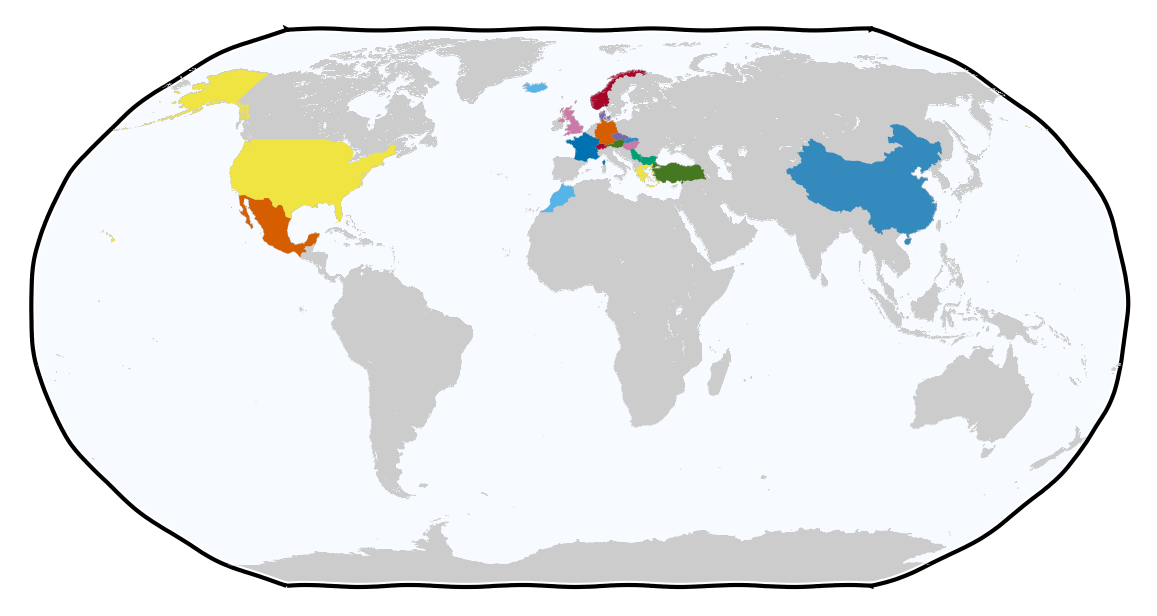

In [7]:
fig_g = plt.figure(figsize=(cm2in([12, 8])))

# Create basemap
m_g = Basemap(resolution='i', projection='robin', lon_0=0)
m_g.drawlsmask(land_color='.8', ocean_color='#f7fbff')
m_g.drawcoastlines(color='.8', linewidth=.1)
m_g.drawcountries(color='.8', linewidth=.1)

# Fill visited countries
countries = ['CHN', 'CHE', 'DNK', 'TUR', 'MEX', 'HUN', 'ISL', 'BGR', 'GRC', 'FRA',
             'SVK', 'NOR', 'CZE', 'AUT', 'DEU', 'GBR', 'MAR', 'SRB', 'USA',]
plot_country(countries, m_g)

#plt.savefig('/home/dtr/Desktop/World.png', bbox_inches='tight')

plt.show()

## East Europe Trip

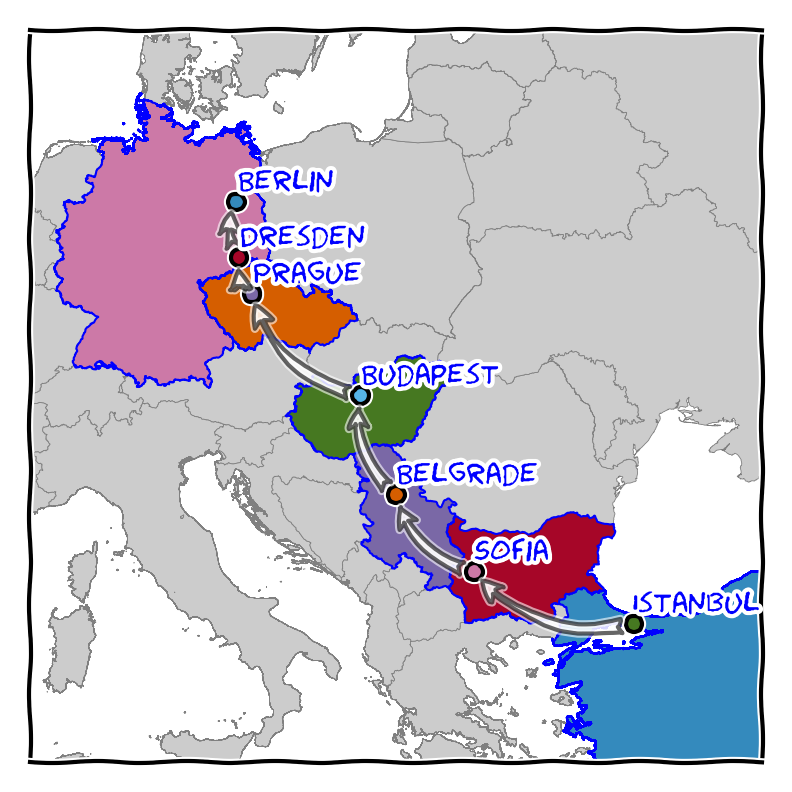

In [69]:
fig_e = plt.figure(figsize=(cm2in([8, 8])))

# Cities
BUD = [47.4925, 19.051389]   # Budapest
SOF = [42.7, 23.333333]      # Sofia
IST = [41.013611, 28.955]    # Istanbul
PRA = [50.083333, 14.416667] # Prague
BEL = [44.816667, 20.466667] # Belgrade
DRE = [51.033333, 13.733333] # Dresden
BER = [52.516667, 13.383333] # Berlin

# Create basemap
m_e = Basemap(width=2200000, height=2200000, resolution='c', projection='tmerc', lat_0=BUD[0], lon_0=BEL[1])

# Fill non-visited countries (fillcontinents does a bad job)
countries = ['AUT', 'CHE', 'FRA', 'DNK', 'SVK', 'GRC', 'ALB',
             'ITA', 'LIE', 'POL', 'ROU', 'SVN', 'BEL', 'HRV',
             'TUN', 'NLD', 'RUS', 'SWE', 'LUX', 'BLR', 'LTU',
             'EST', 'LVA', 'UKR', 'MDA', 'DZA', 'BIH', 'KO-',
             'MKD', 'MNE',]
plot_country(countries, m_e, fc='.8', ec='.5', lw=.2)

# Fill visited countries
countries = ['TUR', 'BGR', 'SRB', 'HUN', 'CZE', 'DEU',]
plot_country(countries, m_e, ec='b', lw=.5)

# Add visited cities
offs = [0, .4]
plot_city(BER, 'Berlin', m_e, offs=offs)
plot_city(DRE, 'Dresden', m_e, offs=offs)
plot_city(PRA, 'Prague', m_e, offs=offs)
plot_city(IST, 'Istanbul', m_e, offs=offs)
plot_city(BEL, 'Belgrade', m_e, offs=offs)
plot_city(SOF, 'Sofia', m_e, offs=offs)
plot_city(BUD, 'Budapest', m_e, offs=offs)

# Connect with arrows
plot_arrow(IST, SOF, m_e)
plot_arrow(SOF, BEL, m_e)
plot_arrow(BEL, BUD, m_e)
plot_arrow(BUD, PRA, m_e)
plot_arrow(PRA, DRE, m_e)
plot_arrow(DRE, BER, m_e)

#plt.savefig('/home/dtr/Desktop/EastEurope.png', bbox_inches='tight')

plt.show()

## Scotland

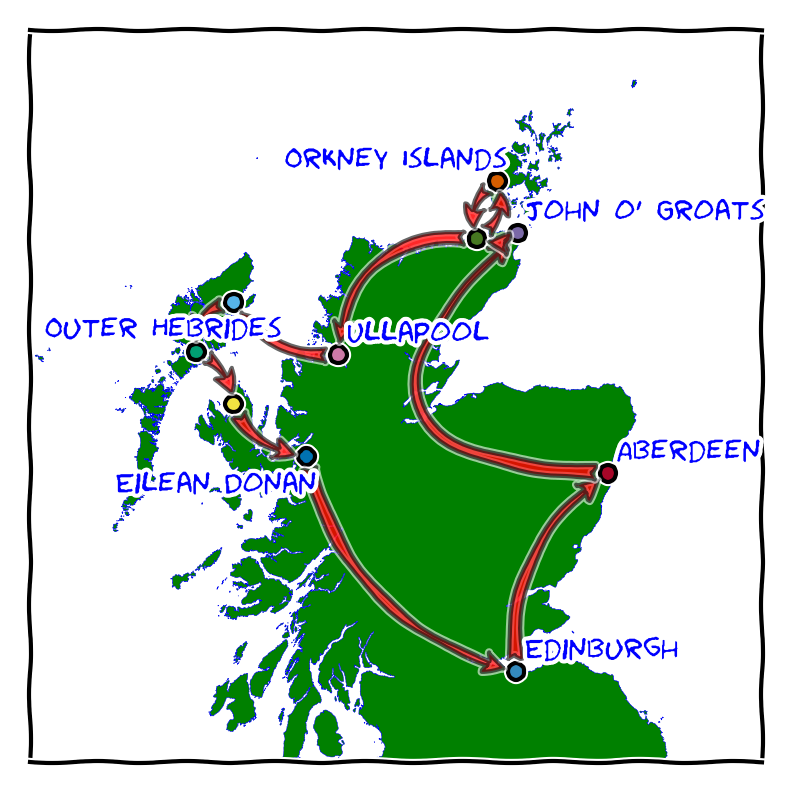

In [68]:
fig_s = plt.figure(figsize=(cm2in([8, 8])))

# Cities
EDI = [55.953056, -3.188889] # Edinburgh
JOG = [58.64, -3.07]         # John o' Groats
ABD = [57.1526, -2.11]       # Aberdeen
INV = [57.4718, -4.2254]     # Inverness
SCR = [58.609722, -3.5525]   # Scrabster
STR = [58.96, -3.3]          # Stromness
ULL = [57.9, -5.166]         # Ullapool
STO = [58.209, -6.387]       # Stornoway
TAR = [57.897749, -6.800595] # Tarbert
UIG = [57.586, -6.357]       # Uig
EID = [57.274028, -5.516111] # Eilean Donan

# Create basemap
m_s = Basemap(width=500000, height=500000, resolution='c', projection='tmerc', lat_0=57.65, lon_0=-4.5)

# Fill country
plot_country(['GBR',], m_s, fc='g', ec='b', lw=.1)

# Add visited cities
plot_city(EDI, 'Edinburgh', m_s)
plot_city(ABD, 'Aberdeen', m_s)
plot_city(JOG, "John o' Groats", m_s)
plot_city(SCR, '', m_s, halign='right')
plot_city(STR, 'Orkney Islands', m_s, halign='right')
plot_city(ULL, 'Ullapool', m_s)
plot_city(STO, '', m_s)
plot_city(TAR, 'Outer Hebrides', m_s, offs=[-.4, .1], halign='center')
plot_city(UIG, '', m_s)
plot_city(EID, 'Eilean Donan', m_s, offs=[.1, -.2], halign='right')

# Connect with arrows
plot_arrow(EDI, ABD, m_s, fc='r')
plot_arrow(ABD, JOG, m_s, fc='r', rad=-1.2)
plot_arrow(JOG, SCR, m_s, fc='r')
plot_arrow(SCR, STR, m_s, fc='r', rad=.4)
plot_arrow(STR, SCR, m_s, fc='r', rad=.4)
plot_arrow(SCR, ULL, m_s, fc='r', rad=.5)
plot_arrow(ULL, STO, m_s, fc='r')
plot_arrow(STO, TAR, m_s, fc='r', rad=.5)
plot_arrow(TAR, UIG, m_s, fc='r')
plot_arrow(UIG, EID, m_s, fc='r', rad=.3)
plot_arrow(EID, EDI, m_s, fc='r', rad=.3)

#plt.savefig('/home/dtr/Desktop/Scotland.png', bbox_inches='tight')
    
plt.show()

## Norway

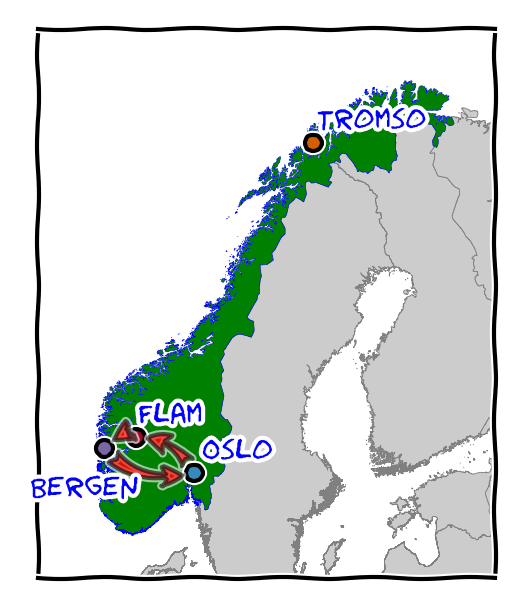

In [67]:
fig_n = plt.figure(figsize=(cm2in([8, 6])))

TRO = [69.682778, 18.942778] # Tromsø
BER = [60.389444, 5.33] # Bergen
FLA = [60.838056, 7.120556] # Flåm
OSL = [59.95, 10.75] # Oslo

# Create basemap
# resolution: c, l, i, h, f
m_n = Basemap(width=1500000, height=1800000, resolution='c', projection='tmerc', lat_0=65, lon_0=15)

# Fill non-visited countries (fillcontinents does a bad job)
countries = ['DNK', 'FIN', 'RUS', 'SWE', 'EST', 'LVA']
plot_country(countries, m_n, fc='.8', ec='.5', lw=.2)

# Fill country
plot_country(['NOR',], m_n, 'g', 'b', .1)

# Add visited cities
plot_city(OSL, 'Oslo', m_n, offs=[.4,.5])
plot_city(FLA, 'Flam', m_n, offs=[0,.5])
plot_city(BER, 'Bergen', m_n, offs=[2.2, -1.2], halign='right')
plot_city(EDI, '', m_n) # Not on map, to use green in cycle
plot_city(TRO, 'Tromso', m_n, offs=[.4,.5])

# Connect with arrows
#plot_arrow(OSL, TRO, m_n, fc='r')
#plot_arrow(TRO, OSL, m_n, fc='r')
plot_arrow(OSL, FLA, m_n, fc='r', rad=.3)
plot_arrow(FLA, BER, m_n, fc='r', rad=.3)
plot_arrow(BER, OSL, m_n, fc='r', rad=.3)

#plt.savefig('/home/dtr/Desktop/Norway.png', bbox_inches='tight')

plt.show()

## Paris

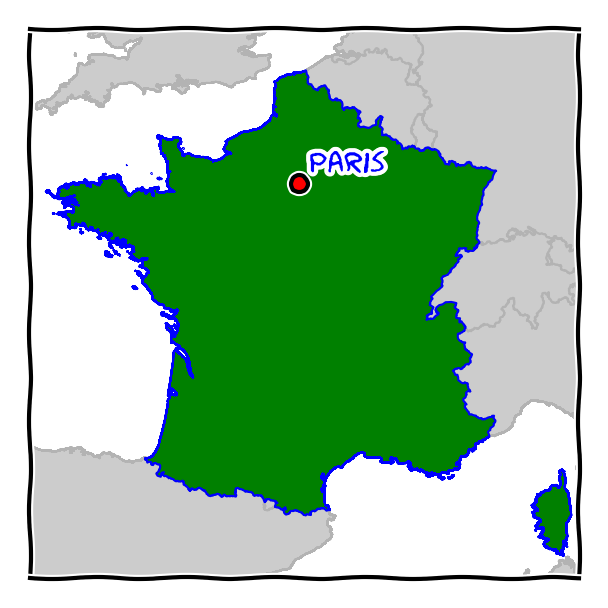

In [66]:
fig_p = plt.figure(figsize=(cm2in([6, 6])))

PAR = [48.8567, 2.3508] # Paris

# Create basemap
m_p = Basemap(width=1200000, height=1200000, resolution='c', projection='tmerc', lat_0=46.5, lon_0=2.5)

# Fill non-visited countries (fillcontinents does a bad job)
countries = ['GBR', 'DEU', 'ITA', 'ESP', 'LUX', 'BEL', 'CHE', 'NLD', 'LIE', 'AUT', 'AND']
plot_country(countries, m_p, fc='.8', ec='.7', lw=.5)

# Fill country
plot_country(['FRA',], m_p, 'g', 'b', .5)

# Add visited cities
plot_city(PAR, 'Paris', m_p, 'r', offs=[.3,.3])

#plt.savefig('/home/dtr/Desktop/Paris.png', bbox_inches='tight')
    
plt.show()

## Vegas

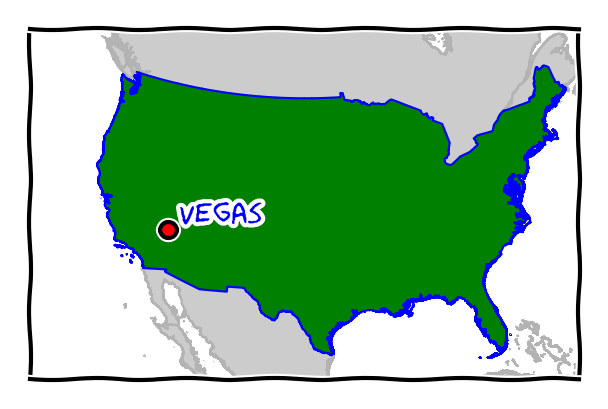

In [65]:
fig_v = plt.figure(figsize=(cm2in([6, 4])))

VEG = [36.175, -115.136389] # Vegas

# Create basemap
m_v = Basemap(width=5500000, height=3500000, resolution='c', projection='tmerc', lat_0=39.5, lon_0=-100)

# Fill non-visited countries (fillcontinents does a bad job)
countries = ['MEX', 'CUB', 'CAN', 'BHS']
plot_country(countries, m_v, fc='.8', ec='.7', lw=.5)

# Fill country
plot_country(['USA',], m_v, 'g', 'b', .5)

# Add visited cities
plot_city(VEG, 'Vegas', m_v,'r', offs=[1,1])

#plt.savefig('/home/dtr/Desktop/Vegas.png', bbox_inches='tight')
    
plt.show()

## Beijing

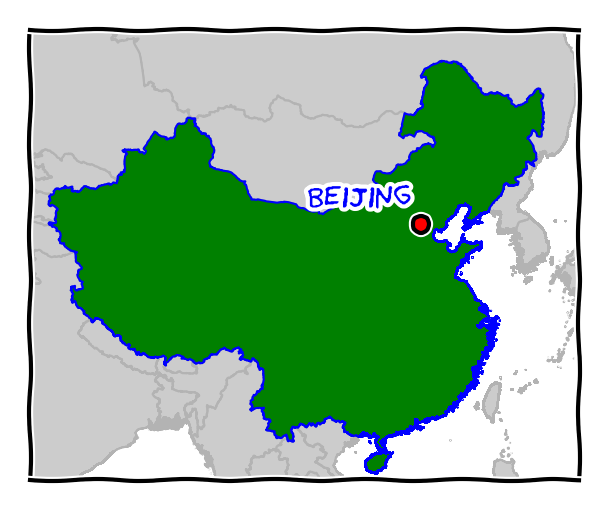

In [64]:
fig_b = plt.figure(figsize=(cm2in([6, 5])))

BEI = [39.916667, 116.383333] # Beijing

# Create basemap
m_b = Basemap(width=5500000, height=4500000, resolution='c', projection='tmerc', lat_0=38, lon_0=103)

# Fill non-visited countries (fillcontinents does a bad job)
countries = ['RUS', 'KOR', 'MNG', 'PRK', 'TWN', 'BGD', 'BTN',
             'IND', 'KGZ', 'NPL', 'TJK', 'JPN', 'KAZ', 'LAO',
             'MMR', 'PHL', 'AFG', 'PAK', 'THA', 'UZB', 'VNM']
plot_country(countries, m_b, fc='.8', ec='.7', lw=.5)

# Fill country
plot_country(['CHN',], m_b, 'g', 'b', .5)

# Add visited cities
plot_city(BEI, 'Beijing', m_b, 'r', offs=[-1,2], halign='right')

#plt.savefig('/home/dtr/Desktop/Beijing.png', bbox_inches='tight')
    
plt.show()

## Austria / Slovakia

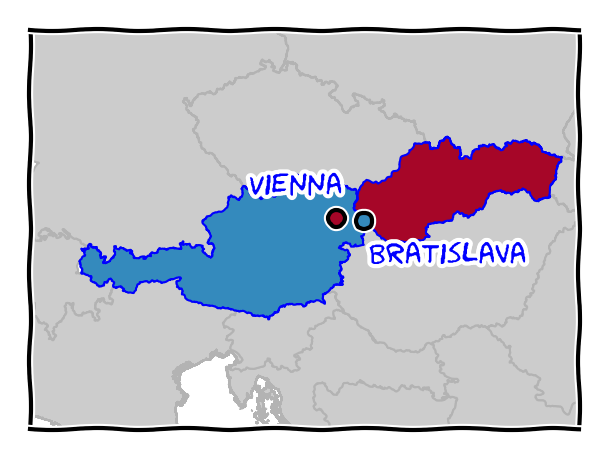

In [80]:
fig_a = plt.figure(figsize=(cm2in([6, 4.5])))

VIE = [48.2, 16.366667] # Vienna
BRA = [48.143889, 17.109722] # Bratislava

# Create basemap
m_a = Basemap(width=1100000, height=800000, resolution='c', projection='tmerc', lat_0=48, lon_0=15.5)

# Fill non-visited countries (fillcontinents does a bad job)
countries = ['DEU', 'CHE', 'ITA', 'CZE', 'HRV', 'SVN', 'HUN', 'POL', 'UKR', 'ROU', 'BIH', 'SRB']
plot_country(countries, m_a, fc='.8', ec='.7', lw=.5)

# Fill country
plot_country(['AUT', 'SVK'], m_a, ec='b', lw=.5)

# Add visited cities
plot_city(BRA, 'Bratislava', m_a, offs=[.1,-.7])
plot_city(VIE, 'Vienna', m_a, offs=[.1,.5], halign='right')

#plt.savefig('/home/dtr/Desktop/AustriaSlovakia.png', bbox_inches='tight')
    
plt.show()

## Morocco

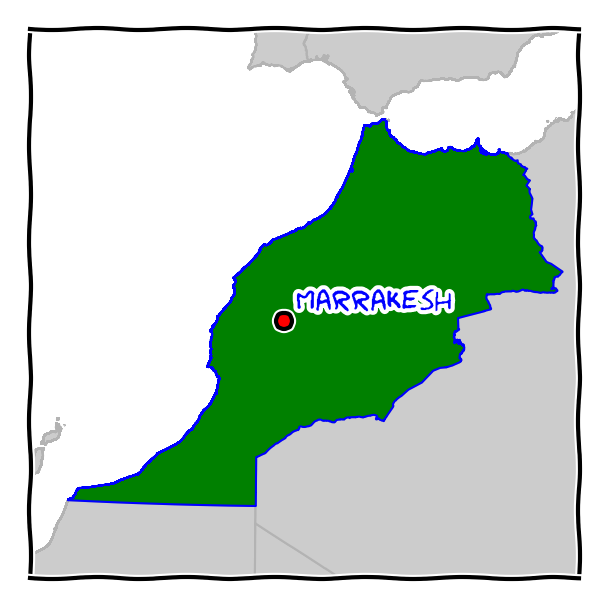

In [91]:
fig_m = plt.figure(figsize=(cm2in([6, 6])))

MAR = [31.63, -8.008889] # Marrakesh

# Create basemap
m_m = Basemap(width=1300000, height=1300000, resolution='c', projection='tmerc', lat_0=32, lon_0=-7.5)

# Fill non-visited countries (fillcontinents does a bad job)
countries = ['ESP', 'ESH', 'MRT', 'PRT', 'DZA']
plot_country(countries, m_m, fc='.8', ec='.7', lw=.5)

# Fill country
plot_country(['MAR',], m_m, 'g', 'b', .5)

# Add visited cities
plot_city(MAR, 'Marrakesh', m_m, 'r', offs=[.3,.3])

#plt.savefig('/home/dtr/Desktop/Marrakesh.png', bbox_inches='tight')
    
plt.show()

## Denmark

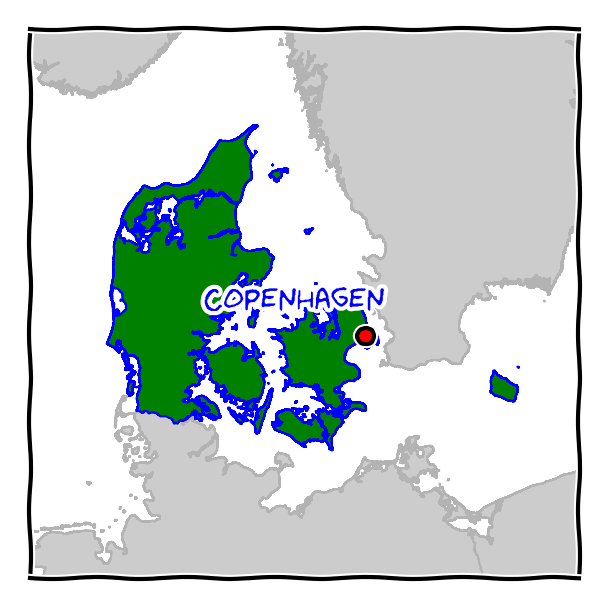

In [86]:
fig_d = plt.figure(figsize=(cm2in([6, 6])))

COP = [55.676111, 12.568333] # Copenhagen

# Create basemap
m_d = Basemap(width=600000, height=600000, resolution='c', projection='tmerc', lat_0=56, lon_0=11.5)

# Fill non-visited countries (fillcontinents does a bad job)
countries = ['DEU', 'POL', 'SWE', 'NOR']
plot_country(countries, m_d, fc='.8', ec='.7', lw=.5)

# Fill country
plot_country(['DNK',], m_d, 'g', 'b', .5)

# Add visited cities
plot_city(COP, 'Copenhagen', m_d, 'r', offs=[.3,.3], halign='right')

#plt.savefig('/home/dtr/Desktop/Copenhagen.png', bbox_inches='tight')
    
plt.show()

## Mexico

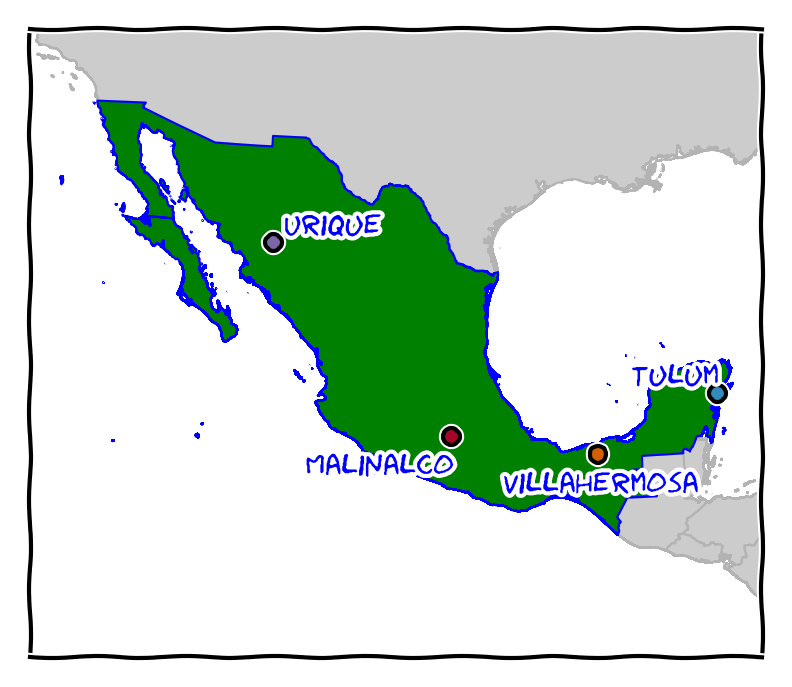

In [153]:
fig_x = plt.figure(figsize=(cm2in([8, 7])))

MDF = [19.433333, -99.133333]  # Mexico City
TUL = [20.214722, -87.428889]  # Tulum
MAL = [18.95, -99.5]           # Malinalco
URI = [27.216667, -107.916667] # Urique
VIL = [17.989167, -92.928056]  # Villahermosa

# Create basemap
m_x = Basemap(width=3500000, height=3000000, resolution='c', projection='tmerc', lat_0=23, lon_0=-102)

# Fill non-visited countries (fillcontinents does a bad job)
countries = ['USA', 'BLZ', 'GTM', 'HND', 'SLV', 'NIC', 'CUB']
plot_country(countries, m_x, fc='.8', ec='.7', lw=.5)

# Fill country
plot_country(['MEX',], m_x, 'g', 'b', .5)

# Add visited cities
#plot_city(MDF, 'Mexico City', m_x, 'r', offs=[.3, .3])
plot_city(TUL, 'Tulum', m_x, offs=[0, .5], halign='right')
plot_city(MAL, 'Malinalco', m_x, offs=[0, -1.5], halign='right')
plot_city(URI, 'Urique', m_x, offs=[.5, .5])
plot_city(EDI, '', m_x) # to use the green dot
plot_city(VIL, 'Villahermosa', m_x, offs=[0, -1.5], halign='center')

#plt.savefig('/home/dtr/Desktop/Mexico.png', bbox_inches='tight')
    
plt.show()

## Switzerland

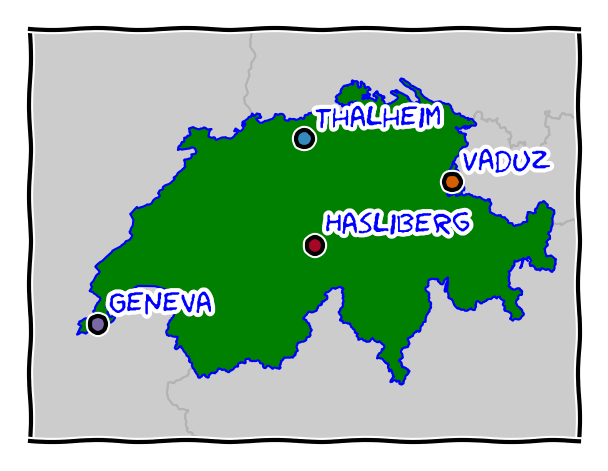

In [173]:
fig_f = plt.figure(figsize=(cm2in([6, 5])))

THA = [47.433333, 8.1] # Thalheim
HAS = [46.733333, 8.2] # Hasliberg
GEN = [46.2, 6.15]     # Geneva
VAD = [47.141, 9.521]  # Vaduz

# Create basemap
m_f = Basemap(width=400000, height=300000, resolution='c', projection='tmerc', lat_0=46.8, lon_0=8.1)

# Fill non-visited countries (fillcontinents does a bad job)
countries = ['DEU', 'AUT', 'ITA', 'FRA']
plot_country(countries, m_f, fc='.8', ec='.7', lw=.5)

# Fill country
plot_country(['CHE', 'LIE'], m_f, 'g', ec='b', lw=.5)

# Plot cities
plot_city(THA, 'Thalheim', m_f)
plot_city(HAS, 'Hasliberg', m_f)
plot_city(GEN, 'Geneva', m_f)
plot_city(EDI, '', m_f) # to use green
plot_city(VAD, 'Vaduz', m_f)

#plt.savefig('/home/dtr/Desktop/Switzerland.png', bbox_inches='tight')
    
plt.show()

## Iceland

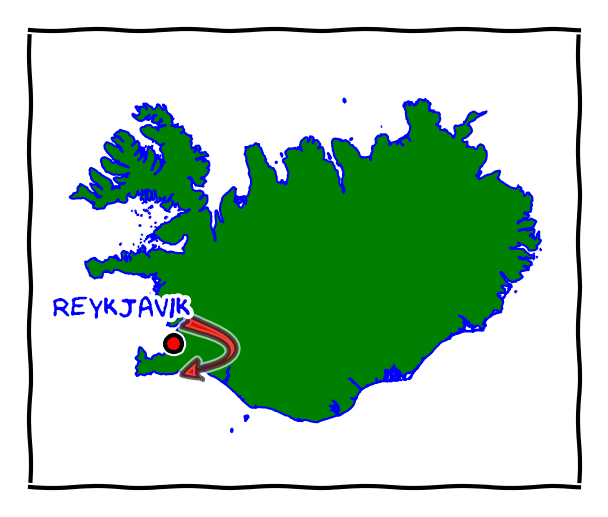

In [115]:
fig_i = plt.figure(figsize=(cm2in([6, 5])))

REY = [64.133333, -21.933333] # Reykjavík

# Create basemap
m_i = Basemap(width=600000, height=500000, resolution='c', projection='tmerc', lat_0=65, lon_0=-19)

# Fill country
plot_country(['ISL',], m_i, 'g', 'b', .5)

# Add visited cities
plot_city(REY, 'Reykjavik', m_i, 'r', offs=[.3,.3], halign='right')

plot_arrow([64.4, -22.], [63.8, -22.], m_i, fc='r', rad=-2)

#plt.savefig('/home/dtr/Desktop/Reykjavik.png', bbox_inches='tight')
    
plt.show()

## UK

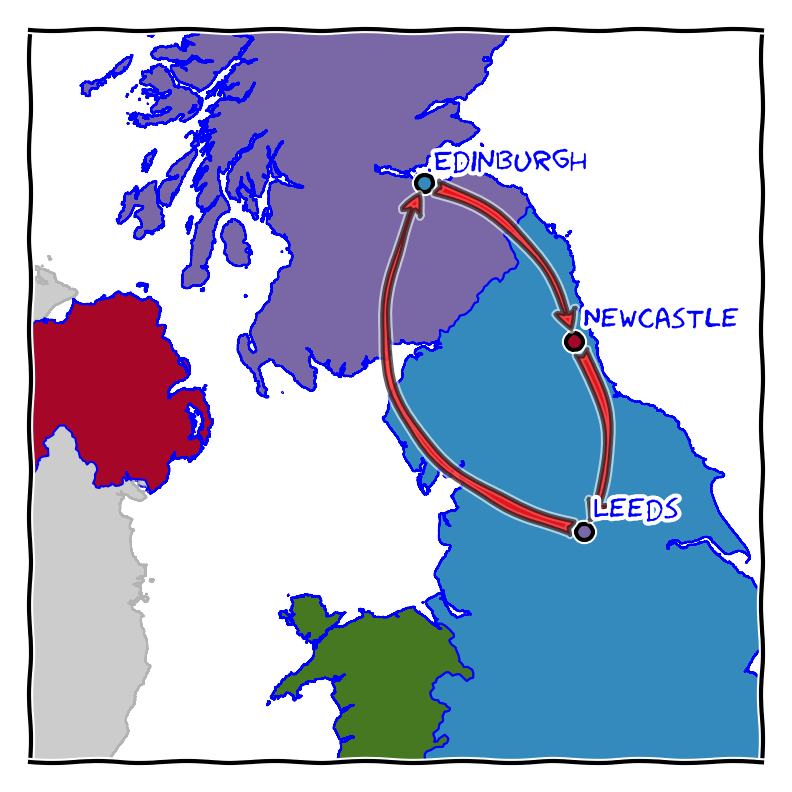

In [134]:
fig_c = plt.figure(figsize=(cm2in([8, 8])))

# Cities
NEW = [54.966667, -1.6]      # Newcastle
LED = [53.799722, -1.549167] # Leeds

# Create basemap
m_c = Basemap(width=500000, height=500000, resolution='c', projection='tmerc', lat_0=54.65, lon_0=-3.5)
#m_c.drawcountries()

# Fill non-visited countries (fillcontinents does a bad job)
plot_country(['IRL'], m_c, fc='.8', ec='.7', lw=.5)

# Fill country
plot_country(['GBR',], m_c, ec='b', lw=.5, adm=1)

# Add visited cities
plot_city(EDI, 'Edinburgh', m_c)
plot_city(NEW, 'Newcastle', m_c)
plot_city(LED, 'Leeds', m_c)

# Connect with arrows
plot_arrow(EDI, NEW, m_c, fc='r')
plot_arrow(NEW, LED, m_c, fc='r')
plot_arrow(LED, EDI, m_c, fc='r', rad=-.6)

#plt.savefig('/home/dtr/Desktop/England.png', bbox_inches='tight')
    
plt.show()